 REGEX- Machine Learning and Deep Learning Summer Internship Final Project

REG ID: SIRSS1270


Name: GEETHAARUMUGAM

Mentor: - Pavan Tiwari

Team Members: 
Pallav Purohit

Nikunj Mehta

Sailaja Morrenagari

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('C://Users//DELL INSPIRON 15R//Desktop//fraudTrain.csv')

In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True) # unnecessary column

In [4]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
data.shape

(1296675, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [7]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
!pip install SMOTE

In [9]:
!pip install imblearn

In [10]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\dell inspiron 15r\anaconda3\lib\site-packages (0.8.0)


In [11]:
from imblearn import under_sampling, over_sampling

In [12]:
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report # classification metrics
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods
from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## DATA PREPROCESSING

In [13]:
# Checking Null values
pd.DataFrame(data.isnull().value_counts())

,,,,,,,,,,,,,,,,,,,,,,0
trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1296675


## EXPLORATORY DATA VISULAIZATION

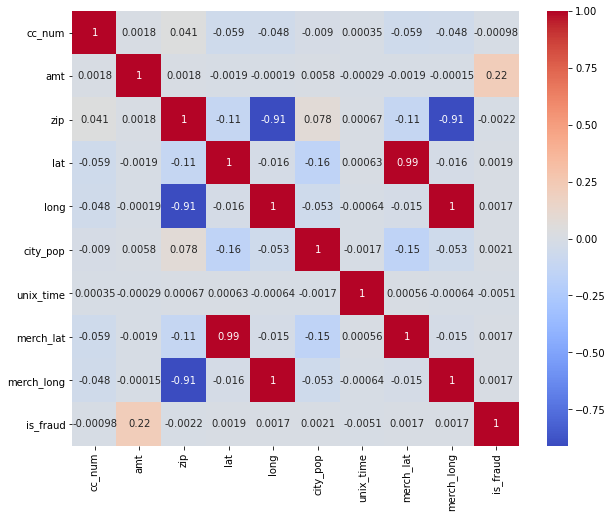

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

In [15]:
# Binarizing Gender column
def gender_binarizer(x):
    if x=='F':
        return 1
    if x=='M':
        return 0
    
data['gender'] = data['gender'].transform(gender_binarizer)

In [16]:
# Seperating nominal from numeric
# Note:There are almost 2M records in dfz.In order to avoid the heavy calculation,only the first 100000 rows were selected.
df2 = data.loc[:99999,data.dtypes!=np.object]
df2

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,1,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,1,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,0,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,0,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,0,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,2475085306462014,95.14,0,56152,44.2378,-95.2739,1507,1330443409,44.718105,-95.843397,0
99996,4005676619255478,8.75,0,70726,30.4590,-90.9027,71335,1330443447,29.931844,-90.610715,0
99997,3519232971341141,34.20,0,43903,40.4731,-80.9596,2208,1330443454,41.076153,-80.506107,0
99998,4040099974063068803,73.11,0,58769,48.3396,-102.2400,229,1330443491,48.535070,-102.524262,0


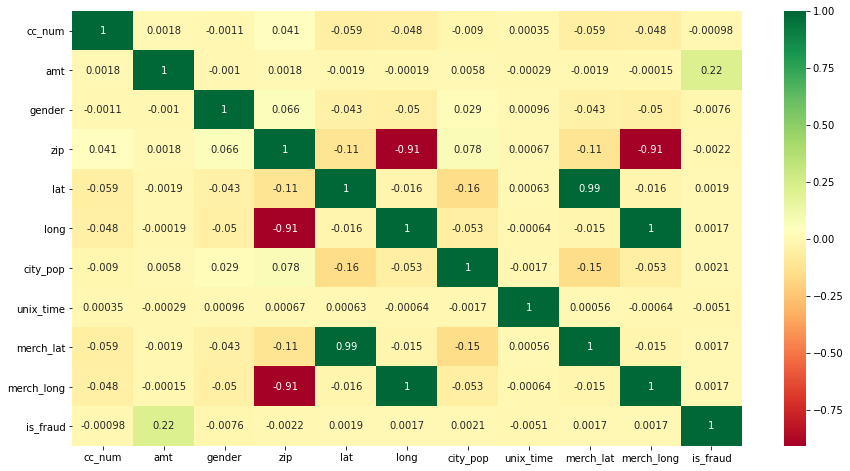

In [17]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
X = df2.drop(['cc_num','is_fraud'],axis=1)
y = df2['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


<AxesSubplot:title={'center':'Correlation matrix of original data'}>

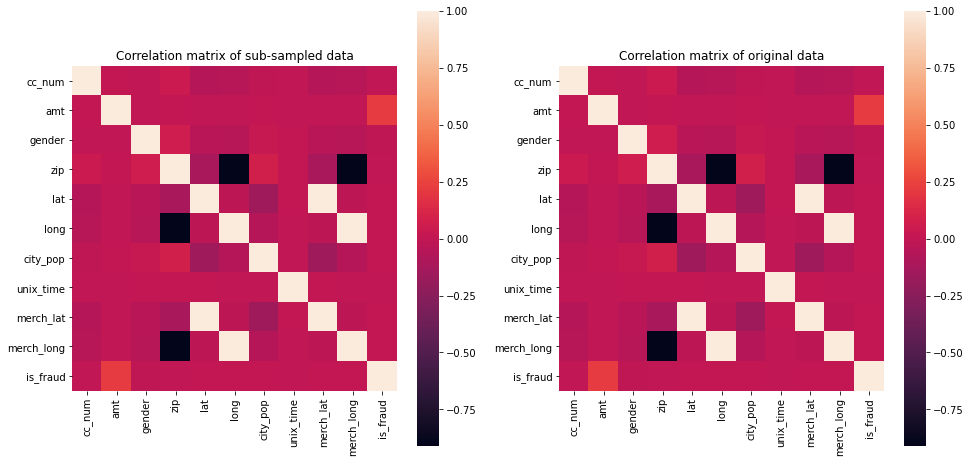

In [19]:
corrmat = data.corr()
corrmat_orig = data.corr()
f, ax = plt.subplots(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Correlation matrix of sub-sampled data')
sns.heatmap(corrmat, vmax=1, square=True)
plt.subplot(1, 2, 2)
plt.title('Correlation matrix of original data')
sns.heatmap(corrmat_orig, vmax=1, square=True)

# Resampling via SMOTE

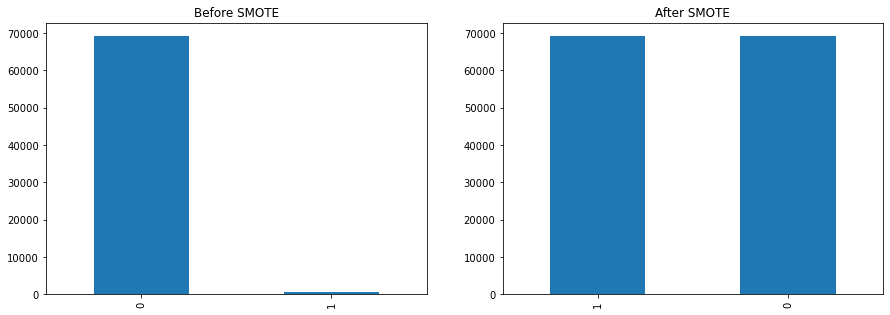

In [20]:
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

In [21]:
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

## Through resampling, fraud transactions (Class = 1) are randomly increased to the same amount as non-fraud transactions (Class = 0) in order to avoid the bias results toward the non-fraudulent class.

In [22]:
X_train, y_train

(               amt  gender    zip        lat        long  city_pop  \
 0        43.170000       1  73564  34.847000  -98.983600       551   
 1        60.110000       0   7747  40.410900  -74.238000     30770   
 2         4.360000       0  88325  32.939600 -105.818900       899   
 3        24.930000       0  66616  39.064500  -95.641300    163415   
 4         9.710000       1  76857  31.957100  -98.965600      1791   
 ...            ...     ...    ...        ...         ...       ...   
 138603  764.486861       0  54980  43.988600  -88.771200       149   
 138604  553.355910       0  15480  39.996100  -79.767800      1946   
 138605  398.228318       1  23106  37.718400  -77.186000       976   
 138606  912.137532       0  25625  34.078008  -80.898961      1607   
 138607  988.343881       0  60091  42.076500  -87.724600     27020   
 
          unix_time  merch_lat  merch_long  
 0       1328640675  33.895247  -98.575664  
 1       1329355964  40.419608  -73.847281  
 2       13

## Scaling
Robust Scaler VS MinMaxScaler VS Standard Scaler


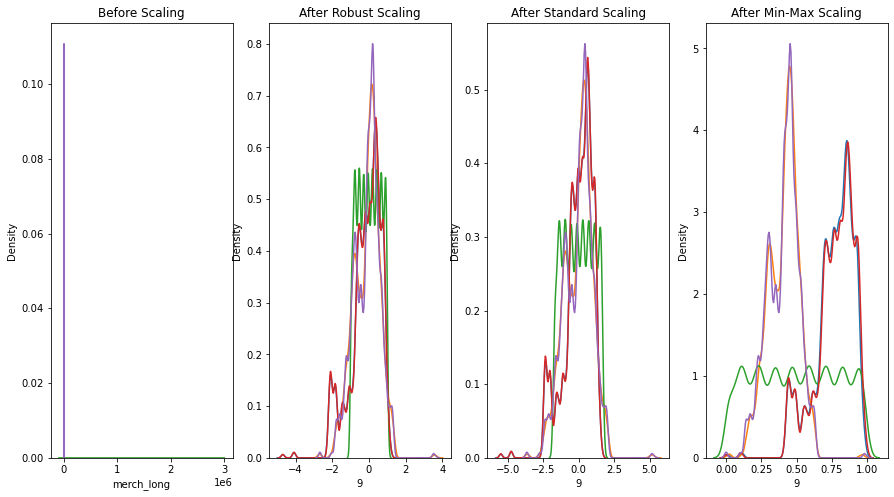

In [23]:
# to compare the effect of each scaler on our dataset
scaler = RobustScaler()
robust_data = scaler.fit_transform(df2)
robust_data = pd.DataFrame(robust_data)
  
scaler = StandardScaler()
standard_data = scaler.fit_transform(df2)
standard_data = pd.DataFrame(standard_data)
  
scaler = MinMaxScaler()
minmax_data = scaler.fit_transform(df2)
minmax_data = pd.DataFrame(minmax_data)

# using KDE plot
#Note: some columns are opted out in order to speed up the process
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(15, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(df2['merch_long'], ax = ax1)
sns.kdeplot(df2['merch_lat'], ax = ax1)
sns.kdeplot(df2['city_pop'], ax = ax1)
sns.kdeplot(df2['long'], ax = ax1)
sns.kdeplot(df2['lat'], ax = ax1)


ax2.set_title('After Robust Scaling')  
sns.kdeplot(robust_data[9], ax = ax2)
sns.kdeplot(robust_data[8], ax = ax2)
sns.kdeplot(robust_data[7], ax = ax2)
sns.kdeplot(robust_data[5], ax = ax2)
sns.kdeplot(robust_data[4], ax = ax2)


ax3.set_title('After Standard Scaling')  
sns.kdeplot(standard_data[9], ax = ax3)
sns.kdeplot(standard_data[8], ax = ax3)
sns.kdeplot(standard_data[7], ax = ax3)
sns.kdeplot(standard_data[5], ax = ax3)
sns.kdeplot(standard_data[4], ax = ax3)


ax4.set_title('After Min-Max Scaling')  
sns.kdeplot(minmax_data[9], ax = ax4)
sns.kdeplot(minmax_data[8], ax = ax4)
sns.kdeplot(minmax_data[7], ax = ax4)
sns.kdeplot(minmax_data[5], ax = ax4)
sns.kdeplot(minmax_data[4], ax = ax4)

plt.show()

## Since we have a huge amount of data, its better to normalize the dataset by using RobustScaler which scales the data according to the quantile range.

In [24]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-0.15410275,  1.        ,  0.59587862, ...,  0.26425094,
        -0.82082323, -0.68512364],
       [-0.11996294,  0.        , -0.93017998, ...,  0.55082586,
         0.13373483,  0.80025091],
       [-0.23231798,  0.        ,  0.93813292, ..., -0.62775997,
        -0.94408038, -1.16419445],
       ...,
       [ 0.56145943,  1.        , -0.57406023, ..., -0.73415811,
        -0.21303583,  0.61194954],
       [ 1.59715971,  0.        , -0.51565371, ..., -0.00359997,
        -0.79446501,  0.38271154],
       [ 1.75074119,  0.        ,  0.28348839, ...,  0.78943871,
         0.48767022, -0.00348903]])

In [26]:
X_test

array([[-0.23380933,  0.        ,  0.90822247, ...,  0.1164865 ,
        -0.75357465, -1.15914901],
       [-0.09741132,  1.        ,  0.20412138, ...,  0.03925752,
         1.4656262 , -0.40505535],
       [-0.04577838,  0.        , -0.98260441, ...,  0.18206602,
         0.65074193,  0.83355239],
       ...,
       [-0.16049137,  0.        ,  0.00826595, ..., -0.81418798,
         0.43925698,  0.29042424],
       [-0.11814913,  1.        , -0.32223285, ...,  0.16481997,
        -1.82071942,  0.32203577],
       [-0.22754163,  0.        , -0.04603658, ..., -1.02822624,
         0.33482717,  0.12196598]])

## MODEL BUILDING 

KNN

In [27]:
param_grid = {'n_neighbors': range(1,20)}
clf = RandomizedSearchCV(KNeighborsClassifier(), param_grid)
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)

In [28]:
### Determining the number of neighbors using RandomizedSearchCV
param_grid = {'n_neighbors': range(1,20)}
knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=2;, score=0.993 total time=   3.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.993 total time=   3.5s
[CV 3/5] END .....................n_neighbors=2;, score=0.994 total time=   3.2s
[CV 4/5] END .....................n_neighbors=2;, score=0.993 total time=   2.9s
[CV 5/5] END .....................n_neighbors=2;, score=0.993 total time=   2.8s
[CV 1/5] END .....................n_neighbors=9;, score=0.982 total time=   3.6s
[CV 2/5] END .....................n_neighbors=9;, score=0.982 total time=   3.6s
[CV 3/5] END .....................n_neighbors=9;, score=0.983 total time=   3.6s
[CV 4/5] END .....................n_neighbors=9;, score=0.982 total time=   3.7s
[CV 5/5] END .....................n_neighbors=9;, score=0.983 total time=   3.6s
[CV 1/5] END .....................n_neighbors=1;, score=0.994 total time=   3.0s
[CV 2/5] END .....................n_neighbors=1;

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 20)},
                   verbose=3)

In [29]:
knn.best_params_ # best parameter

{'n_neighbors': 1}

In [30]:
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[29382   324]
 [   42   252]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29706
           1       0.44      0.86      0.58       294

    accuracy                           0.99     30000
   macro avg       0.72      0.92      0.79     30000
weighted avg       0.99      0.99      0.99     30000



## Gaussian Naive Bayes

In [31]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

print(confusion_matrix(y_test,gnb_pred))
print('\n')
print(classification_report(y_test,gnb_pred))

[[28769   937]
 [   95   199]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     29706
           1       0.18      0.68      0.28       294

    accuracy                           0.97     30000
   macro avg       0.59      0.82      0.63     30000
weighted avg       0.99      0.97      0.98     30000



## Decision Tree

In [32]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[29019   687]
 [   66   228]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29706
           1       0.25      0.78      0.38       294

    accuracy                           0.97     30000
   macro avg       0.62      0.88      0.68     30000
weighted avg       0.99      0.97      0.98     30000



## Random Forest

In [33]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))


[[29448   258]
 [   49   245]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29706
           1       0.49      0.83      0.61       294

    accuracy                           0.99     30000
   macro avg       0.74      0.91      0.80     30000
weighted avg       0.99      0.99      0.99     30000



## AdaBoost

In [34]:
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adabc.fit(X_train,y_train)
adabc_pred = adabc.predict(X_test)

print(confusion_matrix(y_test,adabc_pred))
print('\n')
print(classification_report(y_test,adabc_pred))

[[28308  1398]
 [   63   231]]


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     29706
           1       0.14      0.79      0.24       294

    accuracy                           0.95     30000
   macro avg       0.57      0.87      0.61     30000
weighted avg       0.99      0.95      0.97     30000



##  Bagging

In [35]:
bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200)
bgc.fit(X_train,y_train)
bgc_pred = bgc.predict(X_test)

print(confusion_matrix(y_test,bgc_pred))
print('\n')
print(classification_report(y_test,bgc_pred))

[[29302   404]
 [   50   244]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29706
           1       0.38      0.83      0.52       294

    accuracy                           0.98     30000
   macro avg       0.69      0.91      0.76     30000
weighted avg       0.99      0.98      0.99     30000



## Classification Evaluation via AUROC

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score


# Instantiate the classfiers and make a list
classifiers = [GaussianNB(), 
               KNeighborsClassifier(n_neighbors= knn.best_params_.get('n_neighbors')),
               DecisionTreeClassifier(random_state=101),
               RandomForestClassifier(random_state=101),
               AdaBoostClassifier(random_state=101),
               BaggingClassifier(random_state=101)
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

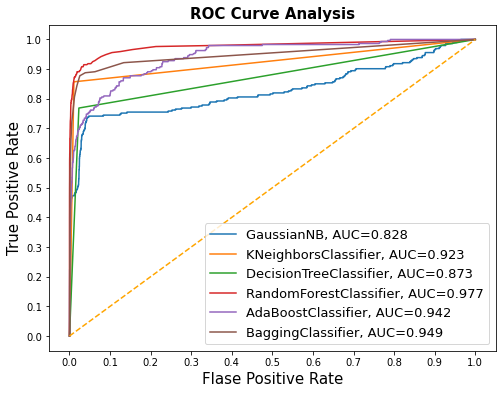

In [37]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()


# THANK YOU